In [ ]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.4/281.4 MB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.7/199.7 KB 20.6 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.3.2-py2.py3-none-any.whl size=281824028 sha256=c6590f9fb9430d0edb4de0f579744a73f43ee7454e3e13d5c391c38f3828ee48
  Stored in directory: /root/.cache/pip/wheels/6c/e3/9b/0525ce8a69478916513509d43693511463c6468db0de237c86
Successfully built pyspark
  Attempting uninstall: py4j
    Found existing installation: py4j 0.10.9.7
    Uninstalling py4j-0.10.9.7:
      Successfully uninstalled py4j-0.10.9.7


In [20]:
from pyspark import SparkContext
from pyspark.sql import SparkSession
from pyspark.sql.functions import *

In [21]:
spark = SparkSession.Builder().getOrCreate()

In [22]:
train = spark.read.csv('CC GENERAL.csv',header = True,inferSchema=True)

In [23]:
train.limit(5).toPandas()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [24]:
train = train.na.drop(how='any')
train.limit(5).toPandas()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,0,1,1200.0,678.334763,244.791237,0.000000,12
4,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.00,0,8,1800.0,1400.057770,2407.246035,0.000000,12


In [25]:
train = train.withColumn("label", train.PURCHASES_FREQUENCY>=0.5)
train = train.withColumn("label", train["label"].cast("string"))

from pyspark.ml.feature import StringIndexer
indexer = StringIndexer(inputCol="label", outputCol="target")
training = indexer.fit(train).transform(train)

training.limit(5).toPandas()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,label,target
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12,false,1.0
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12,false,1.0
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12,true,0.0
3,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,0,1,1200.0,678.334763,244.791237,0.000000,12,false,1.0
4,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.00,0,8,1800.0,1400.057770,2407.246035,0.000000,12,true,0.0


In [26]:
columns = [col for col in training.columns if col not in ['target','CUST_ID','label','PURCHASES_FREQUENCY']]

In [27]:
from pyspark.ml.feature import VectorAssembler
assembler = VectorAssembler()\
.setInputCols(columns)\
.setOutputCol("features")
train_calss = assembler.transform(training)

In [28]:
train_calss.select("features","target").show(5)

+--------------------+------+
|            features|target|
+--------------------+------+
|[40.900749,0.8181...|   1.0|
|[3202.467416,0.90...|   1.0|
|[2495.148862,1.0,...|   0.0|
|[817.714335,1.0,1...|   1.0|
|[1809.828751,1.0,...|   0.0|
+--------------------+------+
only showing top 5 rows



In [29]:
from pyspark.ml.classification import RandomForestClassifier
rf = RandomForestClassifier(featuresCol = 'features',labelCol = "target")

In [30]:
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
from pyspark.ml.evaluation import BinaryClassificationEvaluator

In [31]:
paramGrid = ParamGridBuilder()\
   .addGrid(rf.numTrees, [100, 200, 300])\
   .addGrid(rf.maxDepth, [1, 2, 3, 4, 5, 6, 7, 8])\
   .addGrid(rf.maxBins, [25, 28, 31])\
   .addGrid(rf.impurity, ["entropy", "gini"])\
   .build()

In [32]:
evaluator = BinaryClassificationEvaluator(labelCol = "target", rawPredictionCol = "prediction") 

crossval = CrossValidator(estimator = rf,
                          estimatorParamMaps = paramGrid,
                          evaluator = evaluator,
                          numFolds = 5)

In [33]:
train_rf, test_rf = train_calss.randomSplit([0.8, 0.2])

In [35]:
cvModel = crossval.fit(train_rf)

In [36]:
predictions = cvModel.transform(test_rf)

In [37]:
predictions.select("features","prediction","target").limit(5).toPandas()

,features,prediction,target
0,"[1809.828751, 1.0, 1333.28, 0.0, 1333.28, 0.0,...",0.0,0.0
1,"[1014.926473, 1.0, 861.49, 661.49, 200.0, 0.0,...",1.0,1.0
2,"[630.794744, 0.818182, 1492.18, 1492.18, 0.0, ...",1.0,1.0
3,"[1516.92862, 1.0, 3217.99, 2500.23, 717.76, 0....",0.0,0.0
4,"[2016.684686, 1.0, 176.68, 0.0, 176.68, 0.0, 0...",0.0,0.0


In [38]:
evaluator = BinaryClassificationEvaluator(labelCol = "target", rawPredictionCol = "prediction") 
evaluator.evaluate(predictions)

0.9444444444444444

In [39]:
from pyspark.ml.classification import LogisticRegression
lr = LogisticRegression(featuresCol="features",labelCol="target",maxIter=10, regParam=0.3, elasticNetParam=0.8)

In [40]:
train_lr=train_calss.select("features","target")

In [41]:
training, testing = train_lr.randomSplit([0.8, 0.2])

In [42]:
model = lr.fit(training)

In [43]:
predictions = model.transform(testing)
predictions.select("prediction", "target", "features").show(5)

+----------+------+--------------------+
|prediction|target|            features|
+----------+------+--------------------+
|       1.0|   1.0|(16,[0,1,5,8,9,11...|
|       1.0|   1.0|(16,[0,1,5,8,9,11...|
|       1.0|   1.0|(16,[0,1,5,8,9,11...|
|       1.0|   1.0|(16,[0,1,5,8,9,11...|
|       1.0|   1.0|[4.708041,0.36363...|
+----------+------+--------------------+
only showing top 5 rows



In [44]:
evaluator = BinaryClassificationEvaluator(labelCol = "target", rawPredictionCol = "prediction")
evaluator.evaluate(predictions)

0.8819444444444444

In [45]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator

columns = [col for col in training.columns if col not in ['target','CUST_ID','label']]
from pyspark.ml.feature import VectorAssembler
assembler = VectorAssembler()\
.setInputCols(columns)\
.setOutputCol("features_clustering")

train_clustering = assembler.transform(training)

In [49]:
import numpy as np
cost = np.zeros(20)
for k in range(2,20):
    kmeans = KMeans()\
            .setK(k)\
            .setSeed(1) \
            .setFeaturesCol("features_clustering")\
            .setPredictionCol("cluster")

    model_k = kmeans.fit(train_clustering)
    cost[k] = model_k.summary.trainingCost

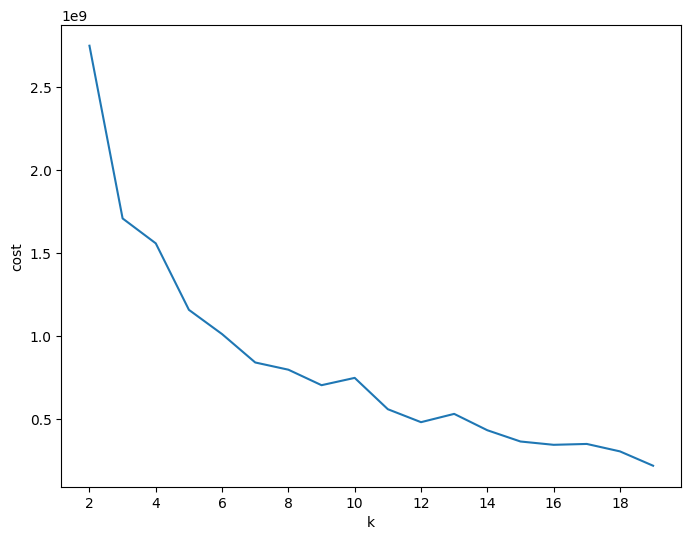

In [50]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import seaborn as sbs
from matplotlib.ticker import MaxNLocator

fig, ax = plt.subplots(1,1, figsize =(8,6))
ax.plot(range(2,20),cost[2:20])
ax.set_xlabel('k')
ax.set_ylabel('cost')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.show()

In [51]:
kmeans = KMeans().setK(2).setSeed(1).setFeaturesCol("features_clustering")
model = kmeans.fit(train_clustering)

In [52]:
predictions = model.transform(train_clustering)

In [53]:
evaluator = ClusteringEvaluator()
silhouette = evaluator.evaluate(predictions)
print("Silhouette with squared euclidean distance = " + str(silhouette))

Silhouette with squared euclidean distance = 0.6776013809048982


In [54]:
centers = model.clusterCenters()
print("Cluster Centers: ")
for center in centers:
    print(center)

Cluster Centers: 
[2.31689911e+03 9.16481015e-01 9.81189853e+02 6.85078382e+02
 2.96111471e+02 1.29893856e+03 2.37488853e-01 3.25512471e-01
 1.61727529e-01 3.80882353e+00 1.30735294e+01 5.58161765e+03
 1.90214634e+03 8.47513195e+02 8.77525000e-02 1.15882353e+01]
[7.15313690e+03 9.31818250e-01 2.27100000e+03 5.40257500e+02
 1.73074250e+03 8.88580125e+02 1.04166750e-01 9.79166750e-01
 1.45833250e-01 2.75000000e+00 3.40000000e+01 9.25000000e+03
 5.10735203e+03 1.08617920e+04 0.00000000e+00 1.20000000e+01]


In [55]:
predictions.select("features","prediction").limit(5).toPandas()

,features,prediction
0,"(81.584711, 0.272727, 0.0, 0.0, 0.0, 2985.3000...",0
1,"(809.847455, 0.875, 0.0, 0.0, 0.0, 908.423608,...",0
2,"(1139.782882, 1.0, 0.0, 0.0, 0.0, 120.612912, ...",0
3,"(1576.305029, 1.0, 0.0, 0.0, 0.0, 382.908547, ...",0
4,"(1656.350781, 1.0, 0.0, 0.0, 0.0, 99.264367, 0...",0


In [56]:
from pyspark.ml.clustering import BisectingKMeans
bkm = BisectingKMeans().setK(2).setSeed(1)
model2= bkm.fit(train_clustering)

In [57]:
predictions2 = model2.transform(train_clustering)

In [58]:
evaluator2= ClusteringEvaluator()
silhouette2 = evaluator.evaluate(predictions2)
print("Silhouette with squared euclidean distance = " + str(silhouette2))

Silhouette with squared euclidean distance = 0.5121807069954727
